# Gromacs - HECBioSim Benchmarks

Results from the [Gromacs](http://www.gromacs.org/) molecular dynamics code on 3x [HECBioSim](http://www.hecbiosim.ac.uk/benchmarks) benchmarks:
- 61K atom system - 1WDN Glutamine-Binding Protein
- 1.4M atom system - A Pair of hEGFR Dimers of 1IVO and 1NQL
- 3M atom system - A Pair of hEGFR tetramers of 1IVO and 1NQL

In [23]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The plots below are for most-recent test on each system/partition/environment combination. They plot the "ns_per_day" performance vs. the number of nodes used for each run. Higher values are better performance.

In each case the number of tasks per node should be equal to the number of (hardware) cores.

Gromacs_61k: 10 relevant performance records


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,29.704,29.751
2,50.724,48.086
4,77.434,74.908
8,86.011,71.901
16,77.991,76.629



Gromacs_1400k: 14 relevant performance records


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,1.494,1.503
2,2.927,2.925
4,5.544,5.465
8,9.659,8.920
16,12.577,12.105



Gromacs_3000k: 10 relevant performance records


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,0.646,0.647
2,1.283,1.283
4,2.537,2.536
8,4.749,4.685
16,6.793,6.984


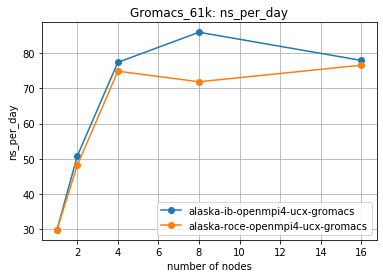

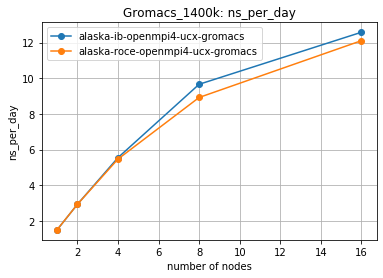

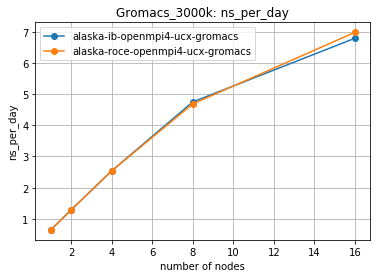

In [119]:
from IPython.display import display, HTML

for test in ['Gromacs_61k', 'Gromacs_1400k', 'Gromacs_3000k']:
    
    # Load performance records & filter to those for ns_per_day:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    perf_records = perf_records.loc[perf_records['perf_var'] == 'ns_per_day']
    print('%s: %i relevant performance records' % (test, len(perf_records)))
    #print(perf_records)
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
#     print(perf_records)
    
    # tabulate:
    # keep only the LAST record in each system/partition/environment for each number of nodes
    table = perf_records.sort_index().groupby(['sysname', 'partition', 'environ', 'n_nodes']).tail(1)
    table['case'] = table[['sysname', 'partition', 'environ']].agg('-'.join, axis=1)
    table = table.pivot(index='n_nodes', columns='case', values='perf_value')
    display(HTML(table.to_html()))
    print()
    
    # plot:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
        data = data.drop_duplicates(subset=['n_nodes'], keep='last') # i.e. most recent
        data = data.sort_values(by='n_nodes')
        spe_label = '-'.join(spe)
        #print(data[['n_nodes', 'perf_value']])
        ax.plot('n_nodes', 'perf_value', 'o-', data=data, label=spe_label)
        
    
    # format:
    ax.set_title('%s: %s' % (test, 'ns_per_day'))
    ax.legend()
    ax.grid()
    ax.set_xlabel('number of nodes')
    ax.set_ylabel(perf_var)
        

# Performance History

The plots below show all performance variables for all tests in the repository, grouped by system/partition/environment.

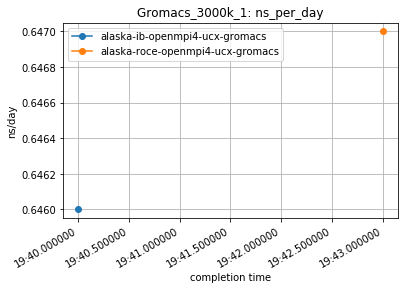

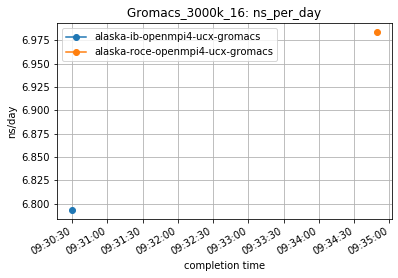

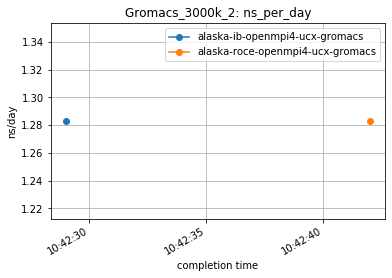

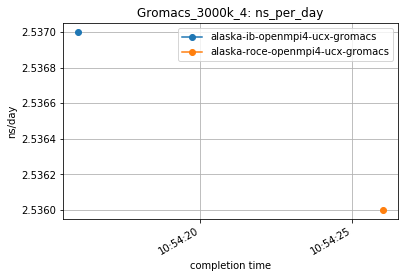

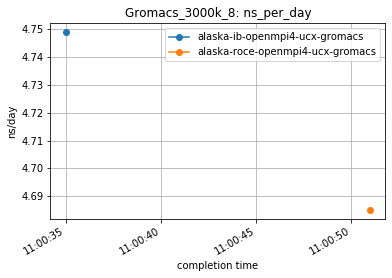

In [60]:
modules.plots.plot_perf_history(perf_records)